# Check out modisscraper script!!!

# TODO

In [ ]:
code source
https://github.com/NASAARSET/MODIS_MAIAC/blob/main/read_and_map_mcd_aerosol.py

In [ ]:
data source 
https://e4ftl01.cr.usgs.gov/MOTA/MCD19A2.061/2024.07.22/

In [ ]:
data exploration:
https://search.earthdata.nasa.gov/search/granules?p=C2324689816-LPCLOUD&pg[0][v]=f&pg[0][gsk]=-start_date&q=C2324689816-LPCLOUD&sp[0]=-105.24902%2C40.20561&tl=1721775833.514!3!!&lat=44.73633748374037&long=-129.48046875000003&zoom=4

In [ ]:
data info
https://lpdaac.usgs.gov/products/mcd19a2v061/

# Scrape data

In [1]:
import GeoLeoXtract as glx
# import GeoLeoXtract.scrapers

import warnings
warnings.filterwarnings('ignore')

reload(glx)

import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf

In [2]:
reload(atmsrf)

<module 'atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad' from '/home/grad/htelg/prog_dev/atm-py/atmPy/data_archives/NOAA_ESRL_GMD_GRAD/surfrad/surfrad.py'>

In [3]:
# site = {'lon': -105.2705, 'lat': 40.015, 'alt': 1500, 'abb': 'bld', 'earthdata_granule': 'h09v04'}

In [76]:
reload(glx.scrapers.earthdata)
reload(glx.satlab)
reload(glx)

<module 'GeoLeoXtract' from '/home/grad/htelg/prog_dev/GeoLeoXtract/GeoLeoXtract/__init__.py'>

In [77]:
satellite = 'TerraAqua'
product='MCD19A2v061'
p2fld_out = f'/nfs/stu3data2/Satellite_data/jpss/{satellite}/{product}/projections/surfrad'

self = glx.scrapers.earthdata.CMRSraper(
            start='20231201 00:00:00',#'20120509 00:00:00', #20010201 00:00:00',#2000-02-24T00:00:00.000Z
            end='20241001 00:00:00',
            sites=atmsrf.network.stations.list,
            product=product,
            satellite=satellite,
            sensor='MODIS',
            p2fld_out=p2fld_out, #'/home/grad/htelg/tmp/',
            prefix='projected2surfrad',
            reporter=None,
            overwrite=False,
            verbose=False,
        )

In [78]:
self.workplan = self.workplan.sort_index(ascending = False)

In [79]:
# self.workplan = self.workplan.iloc[:6]

In [80]:
self.workplan

,site,p2f_out
2024-09-30,PSU,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
2024-09-30,GWN,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
2024-09-30,bnd,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
2024-09-30,DRA,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
2024-09-30,TBL,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
...,...,...
2024-01-05,TBL,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
2024-01-04,SXF,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
2024-01-04,PSU,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
2024-01-04,TBL,/nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...


In [81]:
out = self.process(max_processes=1, 
                   skip_no_granule_found_error=True,
                   skip_granule_missmatch_error=True,
                   skip_http_error = True,
                   skip_multiple_file_on_server_error = True)

.test baadslkdejs
           site                                            p2f_out
2024-01-04  PSU  /nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
DatetimeIndex(['2024-01-04'], dtype='datetime64[ns]', freq=None)
                                       title  ... granule
0  MCD19A2.A2024004.h12v04.061.2024006000527  ...  h12v04

[1 rows x 7 columns]


AssertionError: haaaaalt

In [84]:
dt = pd.Timestamp.now()
dt.date(

In [89]:
end = pd.Timestamp.now().date().__str__()
start = (pd.Timestamp.now() - pd.to_timedelta(int(90), 'days')).date().__str__()
start, end

('2024-07-03', '2024-10-01')

In [37]:
iterator = iter(self.workplan.groupby(self.workplan.index)) # 


In [38]:
next(iterator)

(Timestamp('2024-01-03 00:00:00'),
            site                                            p2f_out
 2024-01-03  SXF  /nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
 2024-01-03  PSU  /nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
 2024-01-03  TBL  /nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...
 2024-01-03  bnd  /nfs/stu3data2/Satellite_data/jpss/TerraAqua/M...)

In [23]:
i = 0
while 1:
    out = self.process_single_day(i, verbose=False,
                                  skip_granule_missmatch_error=True,
                                  skip_no_granule_found_error=True,
                                  skip_http_error = True ,
                                  skip_multiple_file_on_server_error = True)
    i+=1

AssertionError: There really should only be one file left at this stage.

In [25]:
df = self.tp_df_agc

In [30]:
df

,title,updated,links,name,url_download,p2out,granule
0,MCD19A2.A2003109.h11v05.061.2022207094745,2022-08-06T22:13:50.641Z,[{'rel': 'http://esipfed.org/ns/fedsearch/1.1/...,MCD19A2.A2003109.h11v05.061,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,/home/grad/htelg/tmp/MCD19A2.A2003109.h11v05.0...,h11v05
1,MCD19A2.A2003109.h11v05.061.2022238101606,2022-08-26T06:23:04.347Z,[{'rel': 'http://esipfed.org/ns/fedsearch/1.1/...,MCD19A2.A2003109.h11v05.061,https://data.lpdaac.earthdatacloud.nasa.gov/lp...,/home/grad/htelg/tmp/MCD19A2.A2003109.h11v05.0...,h11v05


In [29]:
np.all(df.groupby('name').count() > 1)


np.True_

# CMRS quouries ... aka search Earth

similar to searching here: https://search.earthdata.nasa.gov/search

First find the right product and the associated ID to perform a granule search.

## product search

In [26]:
import requests

In [27]:
import json

In [31]:
# Define the endpoint and parameters for the CMR search
endpoint = 'https://cmr.earthdata.nasa.gov/search/collections.json'
params = {
    'keyword': 'MCD19A2',  # Example: search for MODIS data
    'page_size': 10,     # Number of results to return
    'page_num': 1        # Page number
}

# Make the HTTP GET request
response = requests.get(endpoint, params=params)
data = response.json()

In [32]:
from IPython.display import JSON
# Display the JSON data within Jupyter's rich display system
display(JSON(data))

<IPython.core.display.JSON object>

## search for particular granule

In [191]:
site = atmsrf.network.stations.Table_Mountain

In [195]:
# import geopy.distance import geodesic
# import geopy.point import Point
import geopy
import geopy.distance

### by bounding box

In [234]:
# make bounding box
home = geopy.point.Point(site.lat, site.lon)

dist = 1
dist_inst = geopy.distance.geodesic(kilometers = dist)

bbox = [dist_inst.destination(point = home, bearing=270), dist_inst.destination(point = home, bearing=90), dist_inst.destination(point = home, bearing=180), dist_inst.destination(point = home, bearing=0)]
bbox = [bbox[0].longitude, bbox[2].latitude, bbox[1].longitude, bbox[3].latitude]
bbox = ','.join([f'{b}' for b in bbox])

In [261]:
endpoint = 'https://cmr.earthdata.nasa.gov/search/granules.json'
params = {
    'collection_concept_id': 'C2324689816-LPCLOUD', 
    'temporal': '2022-06-02T00:00:00Z,2022-06-02T23:59:59Z',  # Specific date
    'bounding_box': bbox,  # Global, adjust if necessary
    'page_size': 10  ,# Number of results to return
    'day_night_flag': 'both',
    # 'point': f'{site.lon},{site.lat}',
}

response = requests.get(endpoint, params=params,
                        # auth=auth
                       )
data = response.json()

In [262]:
display(JSON(data))

<IPython.core.display.JSON object>

### by point

In [263]:
endpoint = 'https://cmr.earthdata.nasa.gov/search/granules.json'
params = {
    'collection_concept_id': 'C2324689816-LPCLOUD', 
    'temporal': '2022-06-02T00:00:00Z,2022-06-02T23:59:59Z',  # Specific date
    # 'bounding_box': bbox,  # Global, adjust if necessary
    'page_size': 10  ,# Number of results to return
    'point': f'{site.lon},{site.lat}',
    'day_night_flag': 'both',
}

response = requests.get(endpoint, params=params,
                        # auth=auth
                       )
data = response.json()

In [107]:
site.lon, site.lat

(-105.2705, 40.015)

In [264]:
display(JSON(data))

<IPython.core.display.JSON object>

In [265]:
entries = data['feed']['entry']

In [ ]:
assert(len(entries) != 0), 'No files found'
assert(len(entries) == 1), 'More than one files found, that should not happen!'

# Load data

In [1]:
import GeoLeoXtract as glx
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf
import warnings
warnings.filterwarnings('ignore')

In [144]:
reload(glx)
reload(glx.satlab)
reload(glx.opt_imports)

<module 'GeoLeoXtract.opt_imports' from '/home/grad/htelg/prog_dev/GeoLeoXtract/GeoLeoXtract/opt_imports.py'>

In [145]:
fn = '/home/grad/htelg/Downloads/MCD19A2.A2000062.h09v04.061.2022153233509.hdf'
fn = '/home/grad/htelg/Downloads/MCD19A2.A2024204.h09v04.061.2024205160348.hdf'
# fn = '/home/grad/htelg/tmp/MCD19A2.A2022153.h09v04.061.2024231122040.hdf'

In [146]:
si = glx.satlab.open_file(fn, verbose=True, )# fn = '/home/grad/htelg/Downloads/MCD19A2.A2024204.h09v04.061.2024205160348.hdf'

detected "10.5067/MODIS/MCD19A2.006" product


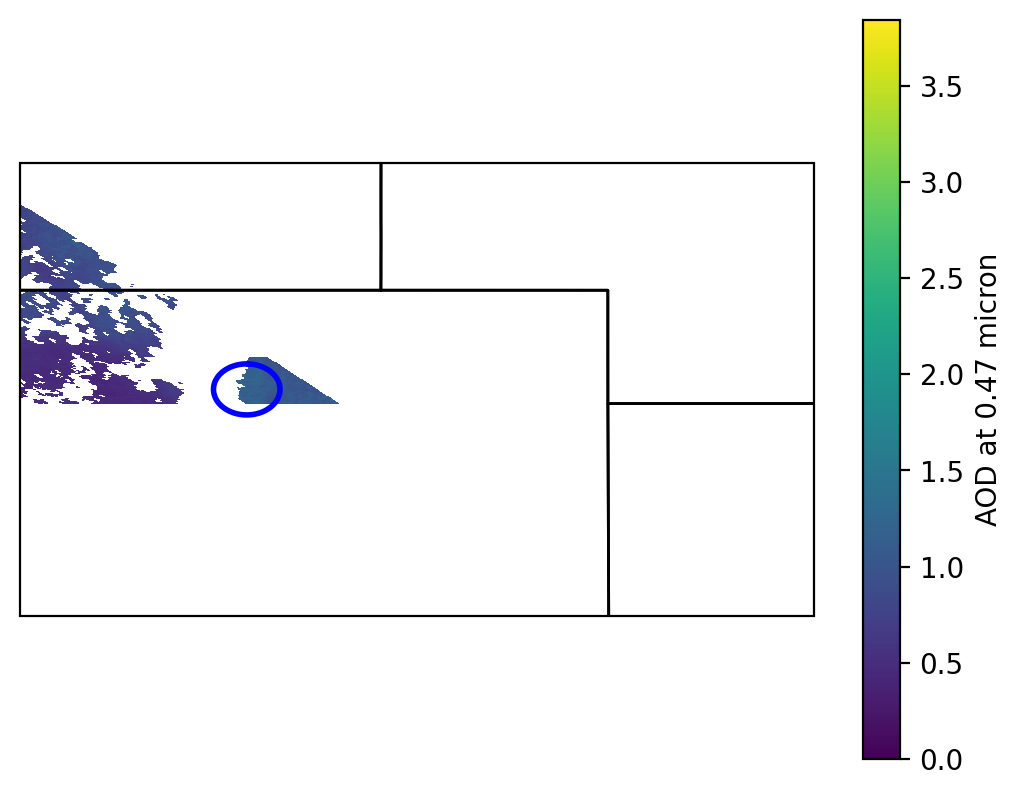

In [149]:
site = atmsrf.network.stations.Table_Mountain
a,pc,cb = si.plot('Optical_Depth_047', draw_circle={'lon': site.lon, 'lat': site.lat, 'r_km': 25})
dc = 2
a.set_extent([site.lon - dc, site.lon + 5, site.lat - dc, site.lat + dc], crs=ccrs.PlateCarree())



In [124]:
proj = si.project_on_sites(atmsrf.network.stations.Table_Mountain)
# self = proj

In [125]:
proj.closest_grid_points

,argmin_x,argmin_y,lon_gritpoint,lat_gridpoint,lon_station,lat_station,distance_station_gridpoint
TBL,1184.0,56.0,-105.234673,40.125,-105.236801,40.124981,0.181168


In [126]:
proj.projection2point

<xarray.Dataset> Size: 288B
Dimensions:                           (site: 1, datetime: 4)
Coordinates:
  * site                              (site) object 8B 'TBL'
Dimensions without coordinates: datetime
Data variables: (12/26)
    Optical_Depth_047                 (site, datetime) float64 32B 1.17 ... nan
    Optical_Depth_047_DQF_assessed    (site, datetime) int8 4B 0 3 0 3
    Optical_Depth_055                 (site, datetime) float64 32B 0.879 ... nan
    Optical_Depth_055_DQF_assessed    (site, datetime) int8 4B 0 3 0 3
    AOD_Uncertainty                   (site, datetime) float64 32B 0.0142 ......
    AOD_Uncertainty_DQF_assessed      (site, datetime) int8 4B 0 3 0 3
    ...                                ...
    argmin_y                          (site) float32 4B 56.0
    lon_gritpoint                     (site) float32 4B -105.2
    lat_gridpoint                     (site) float32 4B 40.12
    lon_station                       (site) float32 4B -105.2
    lat_station                       (site) float32 4B 40.12
    distance_station_gridpoint        (site) float32 4B 0.1812
Attributes:
    version:       6.1.24
    dataset_name:  MCD19A2

In [127]:
proj.projection2area.sel(data_quality = 'high', site = 'TBL', radius = 100, stats = 'median')

coords2del : ['lon', 'lat', 'datetime']


<xarray.Dataset> Size: 324B
Dimensions:              (datetime: 4)
Coordinates:
    radius               int64 8B 100
    stats                <U6 24B 'median'
  * datetime             (datetime) datetime64[ns] 32B 2024-07-22T17:50:00 .....
    site                 <U3 12B 'TBL'
    data_quality         <U4 16B 'high'
Data variables:
    Optical_Depth_047    (datetime) float64 32B 0.991 nan 0.671 nan
    Optical_Depth_055    (datetime) float64 32B 0.738 nan 0.496 nan
    AOD_Uncertainty      (datetime) float64 32B 0.0142 nan 0.0257 nan
    Column_WV            (datetime) float64 32B 1.38 nan 1.349 nan
    AngstromExp_470-780  (datetime) float64 32B nan nan nan nan
    AOD_QA               (datetime) float32 16B 8.193e+03 nan 1.0 nan
    FineModeFraction     (datetime) float32 16B 2.0 nan 2.0 nan
    Injection_Height     (datetime) float32 16B 95.63 nan nan nan
    AOD_qa_assest        (datetime) float32 16B 0.0 nan 0.0 nan
    num_of_valid_points  int64 8B 11387

# explore the hdf file

In [54]:
"""
List datasets and attributes in an HDF4 file.

Args:
file_path (str): Path to the HDF4 file.
"""
# Open the HDF4 file
hdf = pyhdf.SD.SD(fn, pyhdf.SD.SDC.READ)

In [75]:
a = list(hdf.attributes().keys())

In [76]:
a

['HDFEOSVersion',
 'StructMetadata.0',
 'Orbit_amount',
 'Orbit_time_stamp',
 'CoreMetadata.0',
 'ArchiveMetadata.0',
 'identifier_product_doi',
 'identifier_product_doi_authority']

In [78]:
hdf.attributes()[a[1]]

'GROUP=SwathStructure\nEND_GROUP=SwathStructure\nGROUP=GridStructure\n\tGROUP=GRID_1\n\t\tGridName="grid1km"\n\t\tXDim=1200\n\t\tYDim=1200\n\t\tUpperLeftPointMtrs=(-10007554.677000,5559752.598333)\n\t\tLowerRightMtrs=(-8895604.157333,4447802.078667)\n\t\tProjection=GCTP_SNSOID\n\t\tProjParams=(6371007.181000,0,0,0,0,0,0,0,0,0,0,0,0)\n\t\tSphereCode=-1\n\t\tGridOrigin=HDFE_GD_UL\n\t\tGROUP=Dimension\n\t\t\tOBJECT=Dimension_1\n\t\t\t\tDimensionName="Orbits"\n\t\t\t\tSize=4\n\t\t\tEND_OBJECT=Dimension_1\n\t\tEND_GROUP=Dimension\n\t\tGROUP=DataField\n\t\t\tOBJECT=DataField_1\n\t\t\t\tDataFieldName="Optical_Depth_047"\n\t\t\t\tDataType=DFNT_INT16\n\t\t\t\tDimList=("Orbits","YDim","XDim")\n\t\t\tEND_OBJECT=DataField_1\n\t\t\tOBJECT=DataField_2\n\t\t\t\tDataFieldName="Optical_Depth_055"\n\t\t\t\tDataType=DFNT_INT16\n\t\t\t\tDimList=("Orbits","YDim","XDim")\n\t\t\tEND_OBJECT=DataField_2\n\t\t\tOBJECT=DataField_3\n\t\t\t\tDataFieldName="AOD_Uncertainty"\n\t\t\t\tDataType=DFNT_INT16\n\t\t\t\tDim

In [68]:
for key, value in hdf.attributes().items():
    print(f"{key}: {value}")

HDFEOSVersion: HDFEOS_V2.19
StructMetadata.0: GROUP=SwathStructure
END_GROUP=SwathStructure
GROUP=GridStructure
	GROUP=GRID_1
		GridName="grid1km"
		XDim=1200
		YDim=1200
		UpperLeftPointMtrs=(-10007554.677000,5559752.598333)
		LowerRightMtrs=(-8895604.157333,4447802.078667)
		Projection=GCTP_SNSOID
		ProjParams=(6371007.181000,0,0,0,0,0,0,0,0,0,0,0,0)
		SphereCode=-1
		GridOrigin=HDFE_GD_UL
		GROUP=Dimension
			OBJECT=Dimension_1
				DimensionName="Orbits"
				Size=4
			END_OBJECT=Dimension_1
		END_GROUP=Dimension
		GROUP=DataField
			OBJECT=DataField_1
				DataFieldName="Optical_Depth_047"
				DataType=DFNT_INT16
				DimList=("Orbits","YDim","XDim")
			END_OBJECT=DataField_1
			OBJECT=DataField_2
				DataFieldName="Optical_Depth_055"
				DataType=DFNT_INT16
				DimList=("Orbits","YDim","XDim")
			END_OBJECT=DataField_2
			OBJECT=DataField_3
				DataFieldName="AOD_Uncertainty"
				DataType=DFNT_INT16
				DimList=("Orbits","YDim","XDim")
			END_OBJECT=DataField_3
			OBJECT=DataField_4


In [55]:
# List all datasets
datasets = hdf.datasets()

In [88]:
variables_grid5km = [name for name, info in datasets.items() if 'grid5km' in info[0][0]]
variables_grid1km = [name for name, info in datasets.items() if 'grid1km' in info[0][0]]

In [89]:
variables_grid1km

['Optical_Depth_047',
 'Optical_Depth_055',
 'AOD_Uncertainty',
 'Column_WV',
 'AngstromExp_470-780',
 'AOD_QA',
 'FineModeFraction',
 'Injection_Height']

In [79]:
for name, info in datasets.items():
    print(f"Dataset: {name}, Shape: {info[0]}, Type: {info[1]}")

Dataset: Optical_Depth_047, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: Optical_Depth_055, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: AOD_Uncertainty, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: Column_WV, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: AngstromExp_470-780, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: AOD_QA, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: FineModeFraction, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: Injection_Height, Shape: ('Orbits:grid1km', 'YDim:grid1km', 'XDim:grid1km'), Type: (4, 1200, 1200)
Dataset: cosSZA, Shape: ('Orbits:grid5km', 'YDim:grid5km', 'XDim:grid5km'), Type: (4, 240, 240)
Dataset: cosVZA, Shape: ('Orbits:grid5km', 'YDim:grid

In [233]:
info

(('Orbits:grid5km', 'YDim:grid5km', 'XDim:grid5km'), (4, 240, 240), 22, 12)

In [80]:
ds = hdf.select('Optical_Depth_047')

In [81]:
ds.attributes()

{'long_name': 'AOD at 0.47 micron',
 'scale_factor': 0.001,
 'add_offset': 0.0,
 'unit': 'none',
 '_FillValue': -28672,
 'valid_range': [-100, 6000]}

In [20]:
hdf.attributes().keys()

dict_keys(['HDFEOSVersion', 'StructMetadata.0', 'Orbit_amount', 'Orbit_time_stamp', 'CoreMetadata.0', 'ArchiveMetadata.0', 'identifier_product_doi', 'identifier_product_doi_authority'])

In [17]:
# List global attributes
for idx in range(hdf.attributes()):
    attr_name = hdf.attr(idx).info()[0]
    attr_value = hdf.attr(attr_name).get()
    print(f"Global Attribute - {attr_name}: {attr_value}")

TypeError: 'dict' object cannot be interpreted as an integer